>Instituto de Informática  <br>
Nome da/do estudante <br>
### Universidade Federal de Goiás <br>
### **Inteligência Artificial Aplicada a Saúde** <br>

# Batimentos cardíacos - MIT-BIH | Paciente X

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1F2EGByyxQAi5lgOWjisGaV0k_3VcbiAw
To: /content/MIT_BIH_Paciente_3_Treinamento.csv
100% 1.45M/1.45M [00:00<00:00, 146MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wAU9dvPY3-hi4a7RpTGBpQapvAikDDNr
To: /content/MIT_BIH_Paciente_3_Teste.csv
100% 478k/478k [00:00<00:00, 101MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=Fut

#### **Lê o conjunto de dados e os estrutura em diferentes variáveis**

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho onde o dataset se encontra
path_train = '/content/MIT_BIH_Paciente_3_Treinamento.csv'
path_test = '/content/MIT_BIH_Paciente_3_Teste.csv'
path_idx_normal = '/content/MIT_BIH_Paciente_3_Index_test_N.csv' #uso opcional

# Carregar dataset 
xtrain = pd.read_csv(path_train)
xtest = pd.read_csv(path_test)
idx_normal = pd.read_csv(path_idx_normal)

# Separar y referencia
ytest = xtest['82']
ytrain = xtrain['82']

# Remover y do conjunto de treino
xtest = xtest.drop(columns=['82'])
xtrain = xtrain.drop(columns=['82'])

#### **Exibe os primeiros registros de batimentos normais e extra sistólicos, repectivamente**

([<matplotlib.axis.XTick at 0x7f3582a7f8d0>,
 <a list of 9 Text major ticklabel objects>)

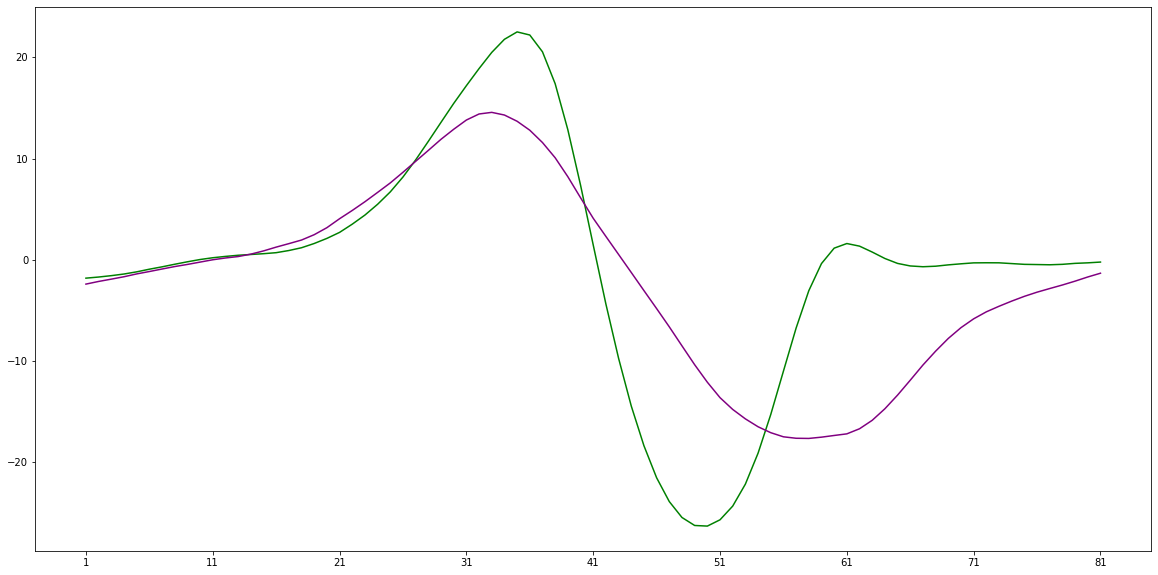

In [ ]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(1, # Gerar apenas uma figura 
                        figsize=(20, 10) # Tamanho da figura
                        )

# plotar primeiro batimento normal
axs.plot(xtrain.iloc[np.where(ytrain == 1)[0][0]],
            color='green', # Definir cor da linha
          )

# plotar primeiro batimento extra sistólico
axs.plot(xtrain.iloc[np.where(ytrain == -1)[0][0]],
            color='purple', # Definir cor da linha
          )
plt.xticks(np.arange( 0, 81, 10))

#### **Gera o modelo para realizar os agrupamentos**


> O número de clusters é igual à quantidade de classes no problema



In [ ]:
from sklearn.cluster import KMeans

# Gerar clusters pelo kmeans
km = KMeans(n_clusters=2, random_state=0).fit(xtrain)

#### **Identifica as classes mais próximas de cada centróide para realizar a classificação**
> Portanto se o cluster 0 estiver mais próximo dos batimentos normais <br>
Então o cluster 0 representa os batimentos normais e o cluster 1 os batimentos extra sistólicos. 

In [ ]:
real_c_y = []
for idx, c in enumerate(km.cluster_centers_):
  dist = np.linalg.norm(xtrain - c, axis=1)
  real_c_y.append((idx, ytrain.iloc[np.where(dist == dist.min())[0][0]]))

  del dist

print(real_c_y)

[(0, 1), (1, -1)]


#### **Atribui os novos dados aos clusters mais próximos**



In [ ]:
result = km.predict(xtest)
result_copy = result.copy()

In [ ]:
# Substituir os clusters formados pelo kmeans pelas classes reais
for c in range(len(real_c_y),):
  result[np.where(result_copy == c)[0]] = real_c_y[c][1]

#### **Gera a matriz de confusão e acurácia total da classificação**


> As linhas são a referência (y real)
>> Linha 1 = Batimentos extra sistólicos <br>
Linha 2 = Batimentos normais 


> As colunas correspondem a saida do modelo (y predito)
>> Coluna 1 = Batimentos extra sistólicos <br>
Coluna 2 = batimentos normais


In [ ]:
from sklearn.metrics import confusion_matrix as conf_matrix

# Exibe a matriz de confusão
conf_matrix(ytest, result)

array([[ 25,  42],
       [  5, 249]])

In [ ]:
# Mostra acurácia total da classificação
correct_values = np.where(ytest == result)[0]
print("Total acuracy: %f" % (100*(correct_values.shape[0] / result.shape[0])) + " %")

del correct_values

Total acuracy: 85.358255 %
